# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set colorblind color palette
sns.set_palette("colorblind")

In [2]:
# Read in data
data = pd.read_csv("../data/merged_data_cleaned.csv", low_memory=False)
target = pd.read_csv("../data/target.csv")

In [3]:
# Convert the columns to lower case
target.columns = target.columns.str.lower()

## Injury distribution

In [4]:
injury_data = pd.read_csv("../data/CSpine/CSV datasets/injuryclassification.csv")

# Convert Nan values to 0
injury_data = injury_data.fillna(0)
injury_data = injury_data.replace({'Y': 1, 'N': 0}).infer_objects(copy=False)
injury_data.columns = injury_data.columns.str.lower()

# Eliminate any dtype object columns
injury_data = injury_data.select_dtypes(exclude=['object'])

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\3791252572.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  injury_data = injury_data.replace({'Y': 1, 'N': 0}).infer_objects(copy=False)


In [5]:
injury_site = injury_data.groupby(["site"]).sum()[["csfractures","ligamentoptions"]]

injury_site = pd.melt(injury_site.reset_index(), id_vars=["site"], value_vars=["csfractures","ligamentoptions"])

# Change the variable names
injury_site = injury_site.replace({"csfractures": "Cervical Spine Fractures", "ligamentoptions": "Ligamentous Injuries"})

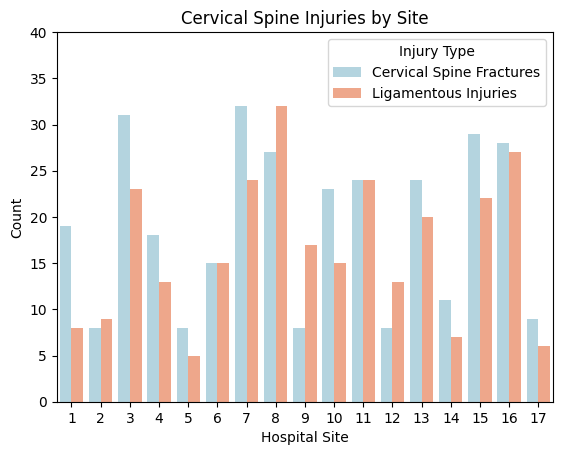

In [6]:
custom_palette = ["#ADD8E6", "#FFA07A"]  # light blue and light orange
sns.barplot(x="site", y="value", hue="variable", data=injury_site, palette=custom_palette)
plt.title("Cervical Spine Injuries by Site")
plt.ylabel("Count")
plt.xlabel("Hospital Site")
plt.ylim([0, 40])
plt.legend(title="Injury Type")
plt.savefig("../plots/cervical_spine_injuries_by_site.pdf", bbox_inches="tight", dpi=300)
plt.show()

## Cases

In [7]:
# Get distribution of target variable per site in data
data_target = pd.merge(data, target, on="studysubjectid")
data_target.totalgcs =  data_target.totalgcs.replace({"7T":7}).astype(float)

# Create a groupby object
cases_per_site = data_target.groupby("site").sum()["csfractures_y"] / data_target.groupby("site").count()["csfractures_y"]

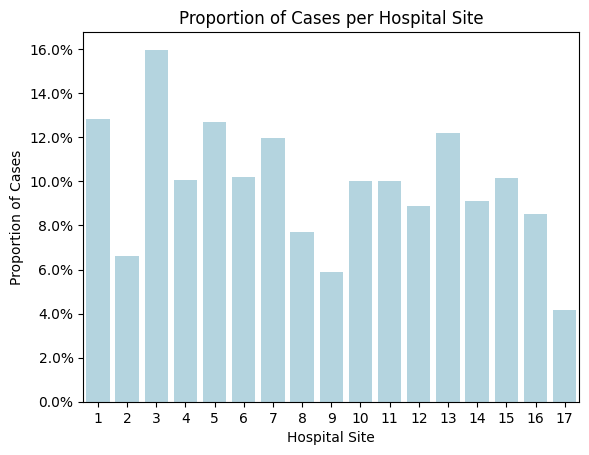

In [8]:
sns.barplot(x=cases_per_site.index, y=cases_per_site.values, color="lightblue")
plt.xlabel("Hospital Site")
plt.ylabel("Proportion of Cases")
plt.title("Proportion of Cases per Hospital Site")
plt.title("Proportion of Cases per Hospital Site")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.savefig("../plots/cases_per_site.pdf", bbox_inches="tight", dpi=300)
plt.show()

## Findings

In [9]:
data_target

,site,caseid,controltype,studysubjectid,arrivaldate,arrivaltime,arrivaltimend,modearrival,receivedintransfer,dxcspineinjury,...,signalchangelevelc1,signalchangelevelc2,signalchangelevelc3,signalchangelevelc4,signalchangelevelc5,signalchangelevelc6,signalchangelevelc7,cordinjurynoradiographic,injurydatetime,csfractures_y
0,1,110001,case,110001,1/1/2000,22:16,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,True
1,1,110001,ems,120027,1/1/2000,17:45,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
2,1,110001,ems,120032,1/1/2000,19:58,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
3,1,110001,moi,130058,1/1/2000,13:20,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
4,1,110001,moi,130072,1/1/2000,16:38,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,17,1713132,ems,1723178,1/1/2000,20:37,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
3310,17,1713132,moi,1733196,1/1/2000,18:05,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
3311,17,1713132,moi,1733220,1/1/2000,17:05,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False
3312,17,1713132,ran,1743311,1/1/2000,15:50,0,1,0,0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1,NaN,False


In [10]:
data_target["painneck"]

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3309    0.0
3310    0.0
3311    1.0
3312    1.0
3313    0.0
Name: painneck, Length: 3314, dtype: float64

In [11]:
check_df = data_target.groupby("totalgcs")["csfractures_y"].sum()

# Eliminate index -1
check_df = check_df.drop(-1)

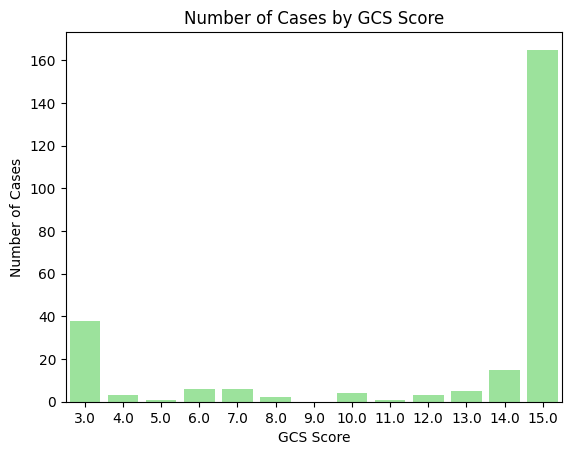

In [12]:
sns.barplot(x=check_df.index, y=check_df.values, color="lightgreen")
plt.xlabel("GCS Score")
plt.ylabel("Number of Cases")
plt.title("Number of Cases by GCS Score")
plt.savefig("../plots/cases_by_gcs.pdf", bbox_inches="tight", dpi=300)
plt.show()

<Axes: >

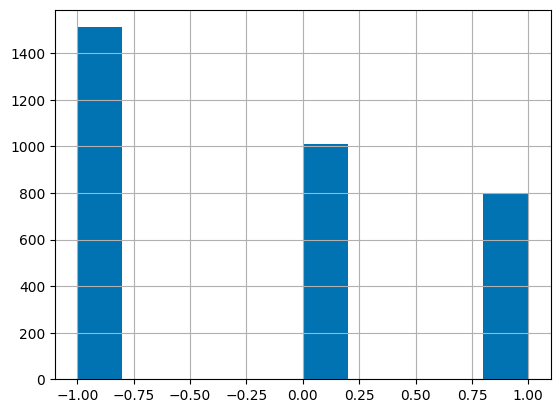

In [13]:
data_target["headfirst"].hist()

In [14]:
data_target["injuryprimarymechanism"].value_counts()

injuryprimarymechanism
-1.0     2949
 1.0       97
 9.0       47
 8.0       43
 14.0      39
 6.0       38
 7.0       24
 11.0      19
 3.0       17
 4.0       11
 10.0       8
 20.0       7
 2.0        7
 12.0       3
 5.0        3
 13.0       2
Name: count, dtype: int64

In [15]:
check_df = data_target.groupby("injuryprimarymechanism")["csfractures_y"].sum()
check_df.drop(-1, inplace=True)

# Sort the values
check_df = check_df.sort_values(ascending=False)

# Only have top 5 and summary the rest
check_df["Other"] = check_df.iloc[5:].sum()
check_df = check_df.sort_values(ascending=False)
check_df = check_df.iloc[:6]

<Axes: xlabel='injuryprimarymechanism'>

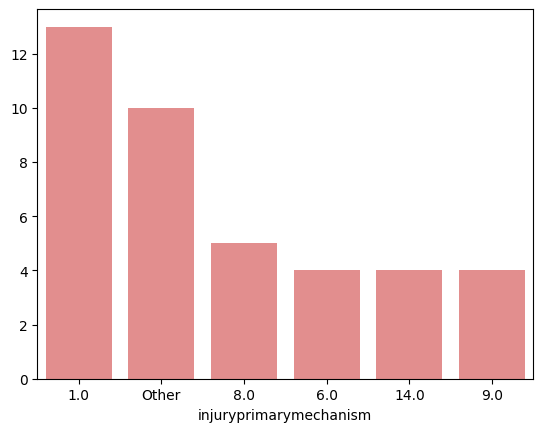

In [16]:
sns.barplot(x=check_df.index, y=check_df.values, color="lightcoral")

<Axes: xlabel='ageinyears', ylabel='Count'>

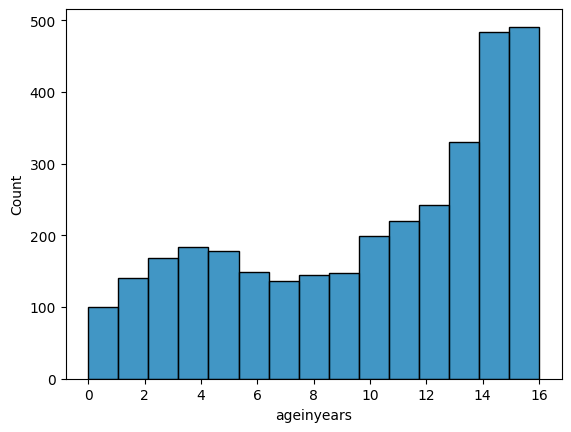

In [17]:
# Covariate on age

sns.histplot(data_target["ageinyears"])

<Axes: xlabel='gender', ylabel='Count'>

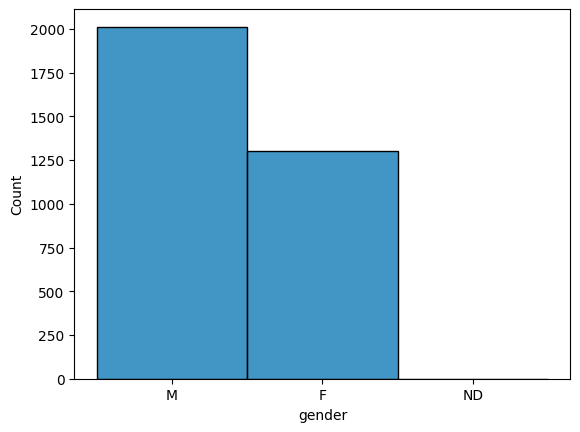

In [18]:
sns.histplot(data_target["gender"])

In [19]:
# Calculate covariates between columns
check_df = data_target.loc[:, ["ageinyears","gender","csfractures_y","highriskmvc","site"]]
check_df.loc[:, "gender"] = check_df.gender.replace({"M": 1, "F": 0, "ND": 1})

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\126826259.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  check_df.loc[:, "gender"] = check_df.gender.replace({"M": 1, "F": 0, "ND": 1})


In [20]:
check_df.groupby("site").corr()

ageinyears    gender  csfractures_y  highriskmvc
site                                                                
1    ageinyears       1.000000  0.007131       0.178323    -0.162193
     gender           0.007131  1.000000       0.132826    -0.139437
     csfractures_y    0.178323  0.132826       1.000000     0.051702
     highriskmvc     -0.162193 -0.139437       0.051702     1.000000
2    ageinyears       1.000000 -0.007682       0.013598     0.108594
...                        ...       ...            ...          ...
16   highriskmvc     -0.041857  0.012370       0.040906     1.000000
17   ageinyears       1.000000  0.031655       0.056426    -0.107005
     gender           0.031655  1.000000      -0.027849     0.020124
     csfractures_y    0.056426 -0.027849       1.000000    -0.005364
     highriskmvc     -0.107005  0.020124      -0.005364     1.000000

[68 rows x 4 columns]

In [25]:
data_target.highriskmvc.value_counts()

highriskmvc
 0.0    2570
 1.0     488
-1.0     256
Name: count, dtype: int64

In [39]:
# Plot the correlation matrix for each site

anal_var = pd.read_csv("../data/CSpine/CSV datasets/analysisvariables.csv")

# Fill Nan with -1
anal_var = anal_var.fillna(-1)

# Lower case
anal_var.columns = anal_var.columns.str.lower()

In [31]:
from scipy.stats import pearsonr

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


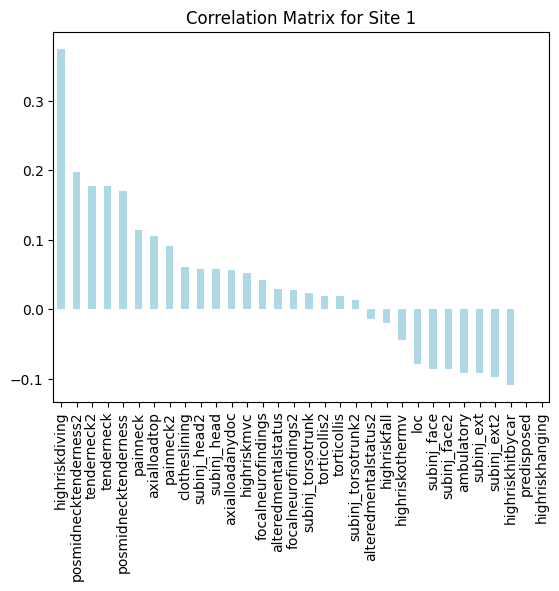

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


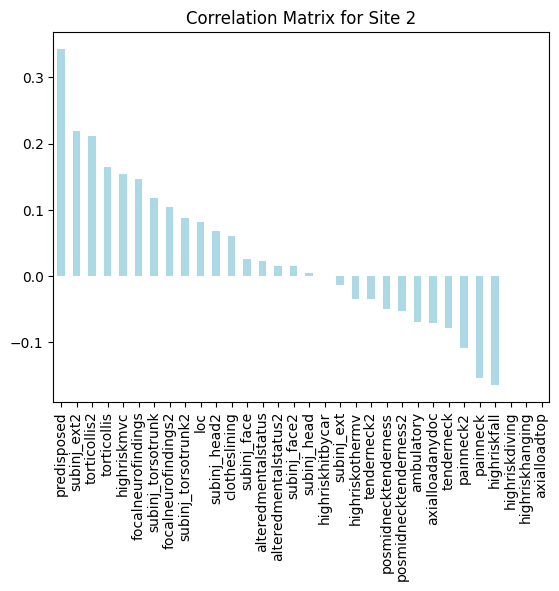

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


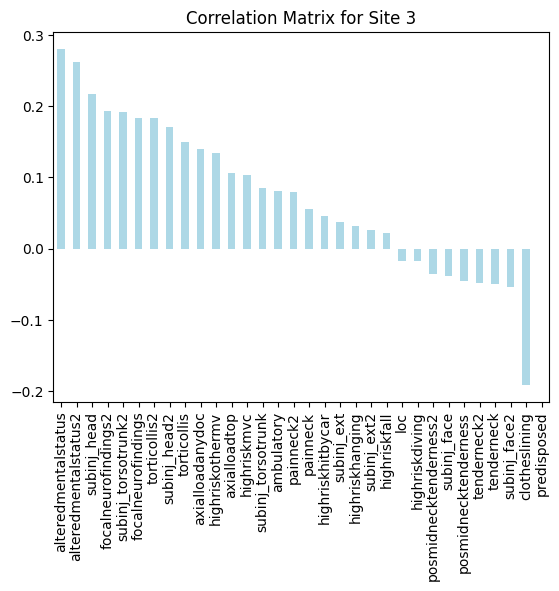

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


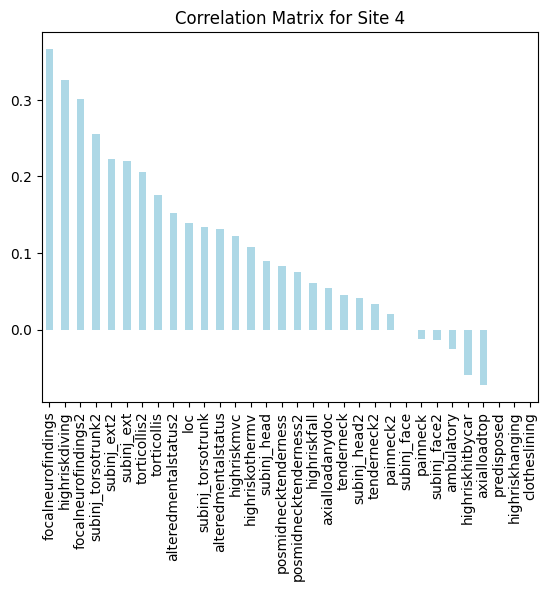

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


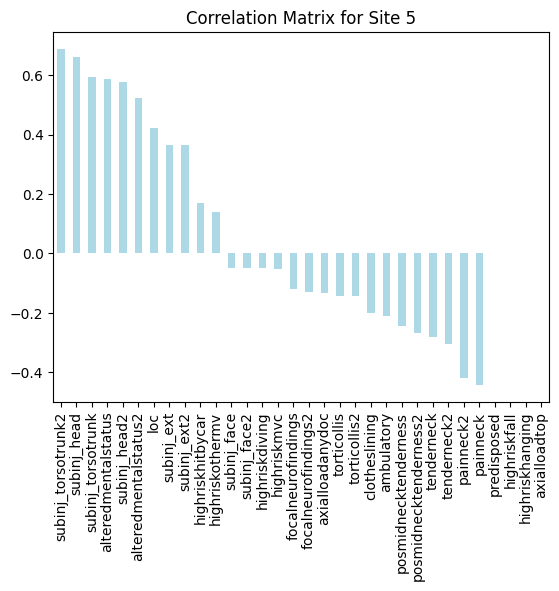

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


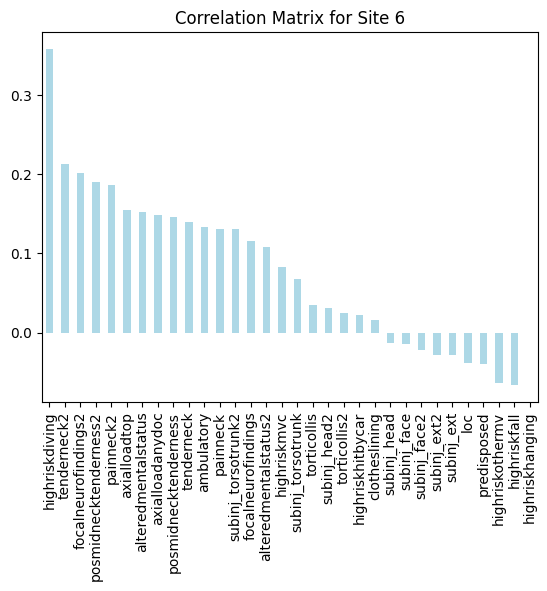

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


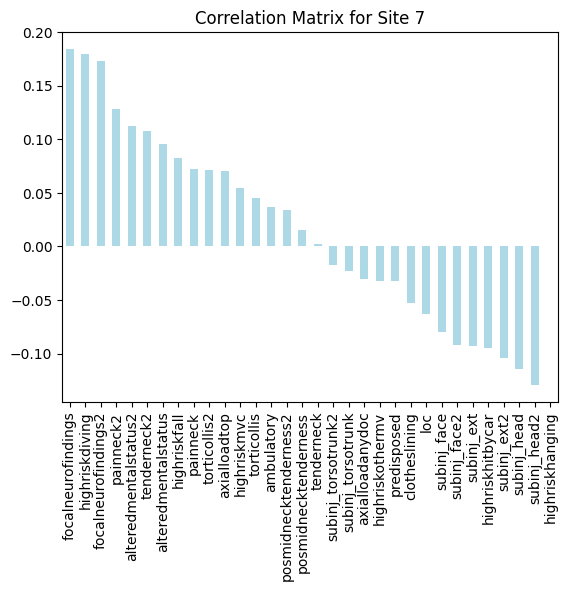

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


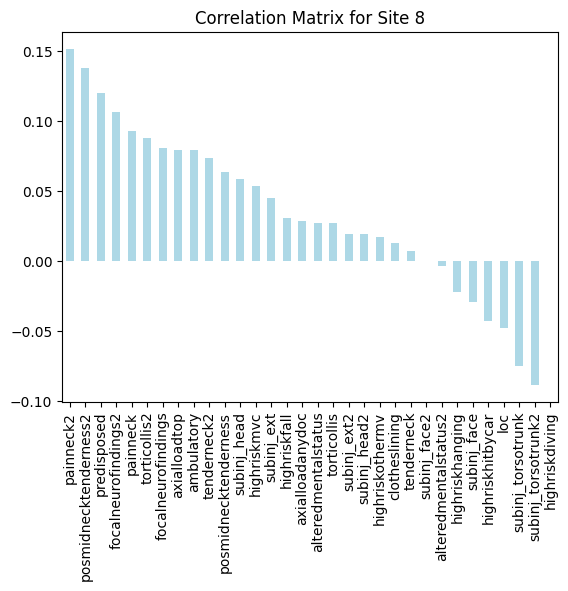

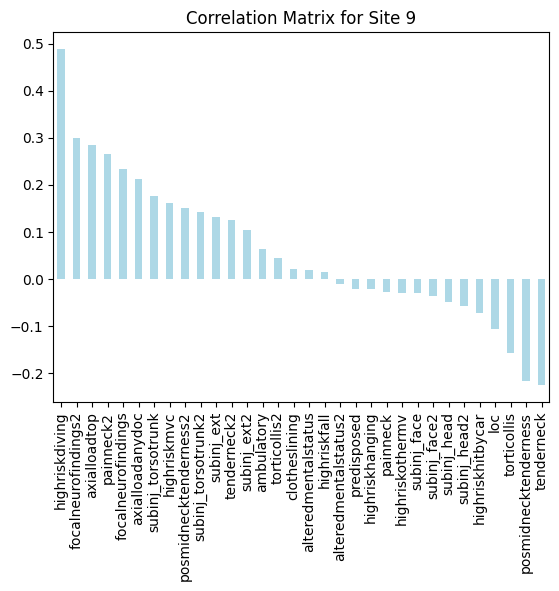

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


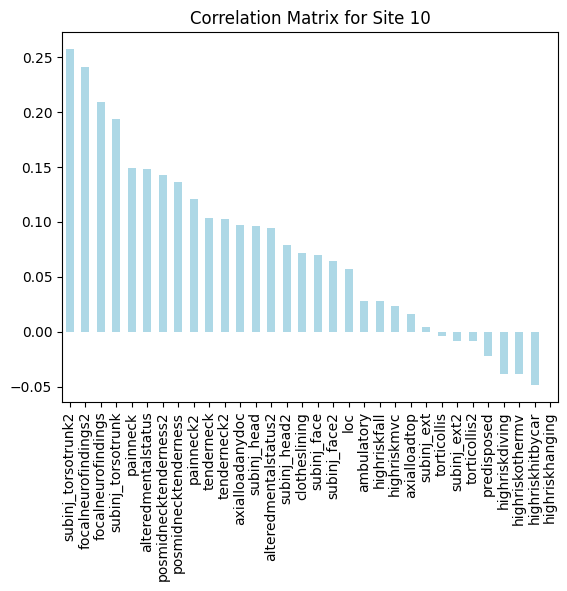

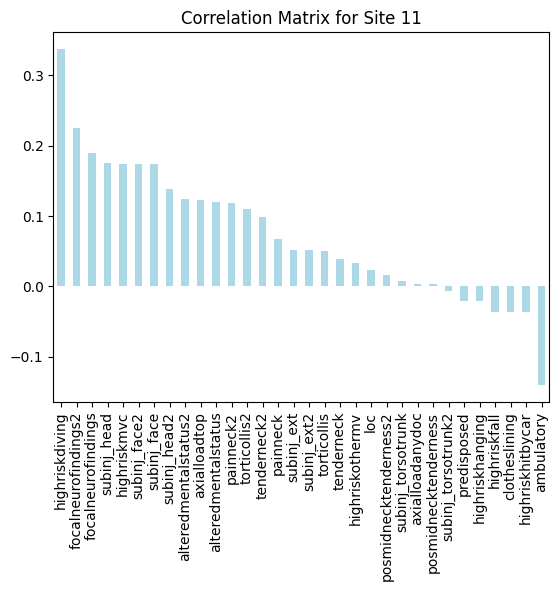

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


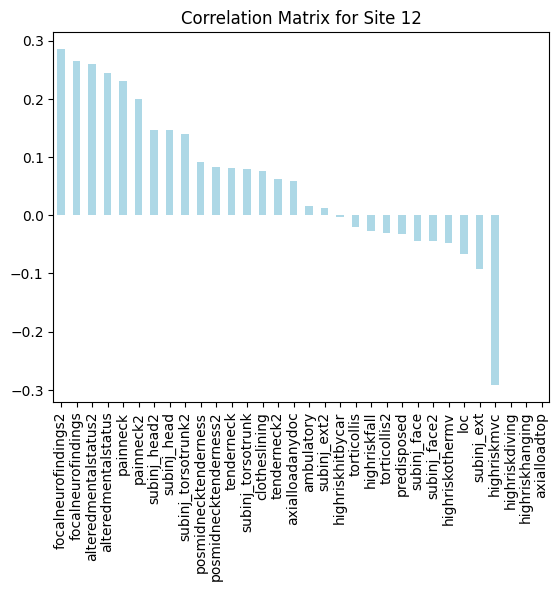

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


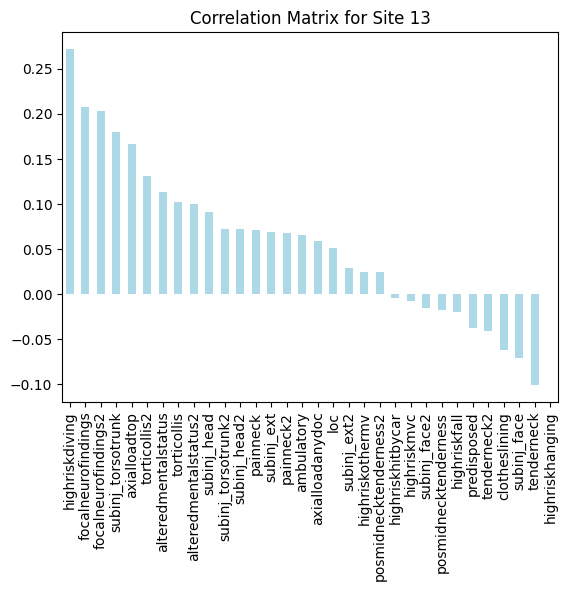

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


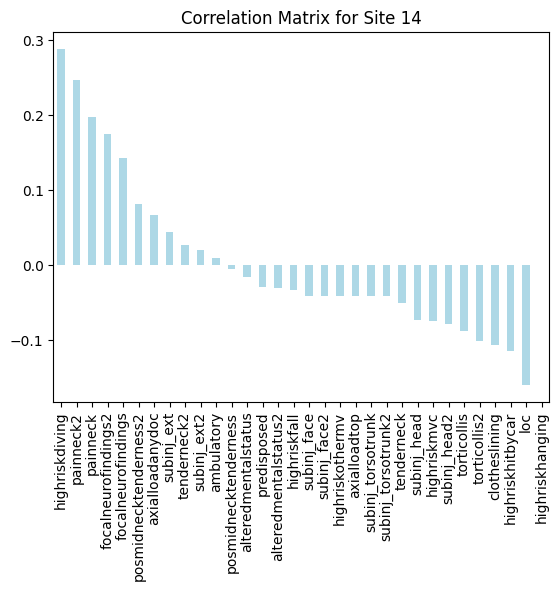

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


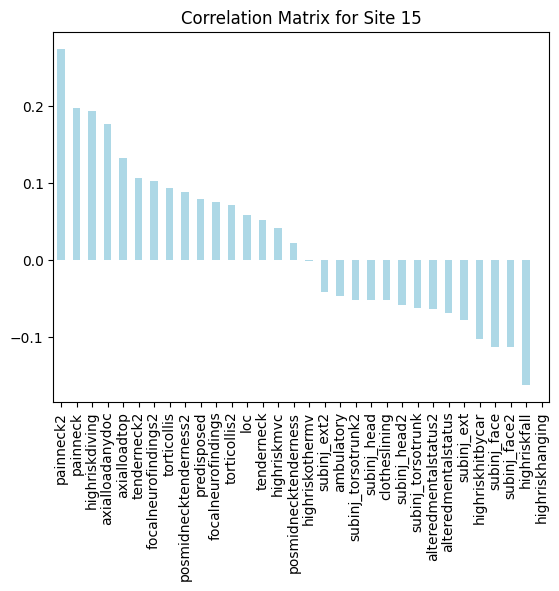

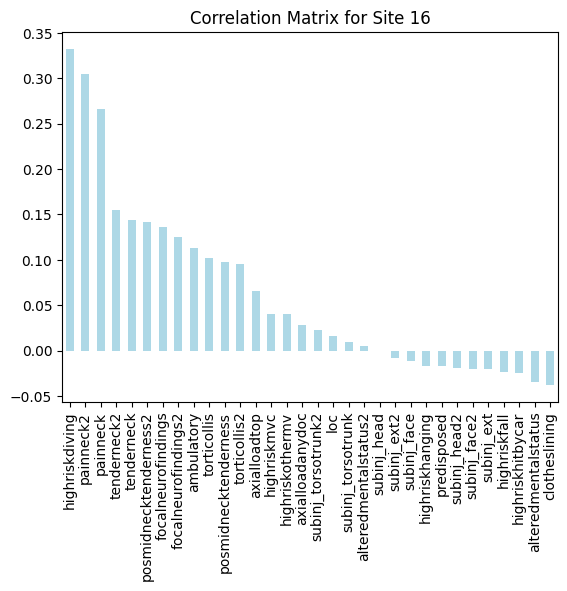

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\804907244.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


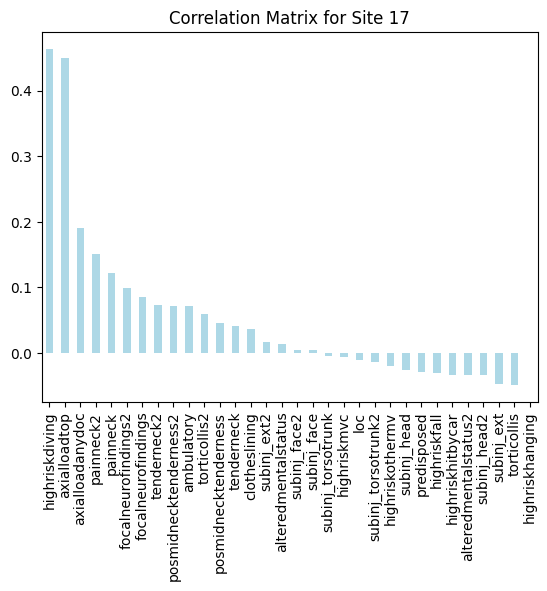

In [59]:
corr_site = []
for site_i in anal_var.site.unique():
    A = anal_var[anal_var.site == site_i].iloc[:, 4:]
    B = target[anal_var.site == site_i]
    correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])
    correlation.sort_values(ascending=False).plot(kind="bar", color="lightblue")
    corr_site.append(correlation)
    plt.title(f"Correlation Matrix for Site {site_i}")
    plt.show()

In [66]:
corr_site

[alteredmentalstatus      0.029374
 loc                     -0.078888
 ambulatory              -0.091036
 focalneurofindings       0.041848
 painneck                 0.114179
 posmidnecktenderness     0.170503
 tenderneck               0.177743
 torticollis              0.019280
 subinj_head              0.058390
 subinj_face             -0.085511
 subinj_ext              -0.091741
 subinj_torsotrunk        0.023626
 predisposed                   NaN
 highriskdiving           0.374796
 highriskfall            -0.019979
 highriskhanging               NaN
 highriskhitbycar        -0.108747
 highriskmvc              0.051702
 highriskothermv         -0.044918
 axialloadanydoc          0.056033
 axialloadtop             0.104799
 clotheslining            0.060597
 alteredmentalstatus2    -0.013988
 focalneurofindings2      0.027807
 painneck2                0.091027
 posmidnecktenderness2    0.198057
 tenderneck2              0.177743
 torticollis2             0.019280
 subinj_head2       

C:\Users\kurt-\AppData\Local\Temp\ipykernel_11548\1240549498.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation = A.apply(lambda x: pearsonr(x, B.csfractures)[0])


<Axes: >

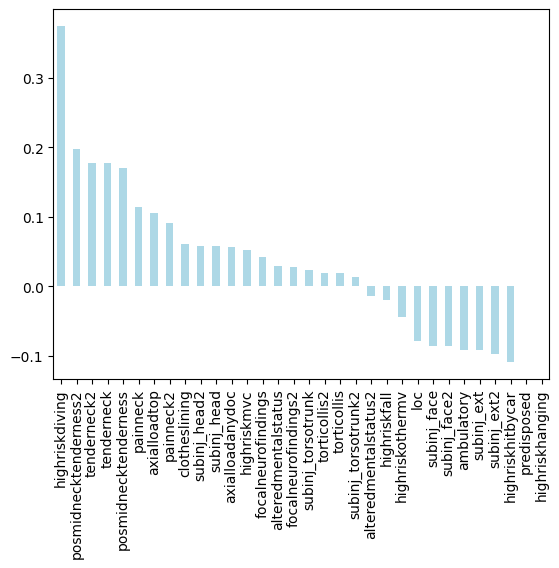

<Axes: >

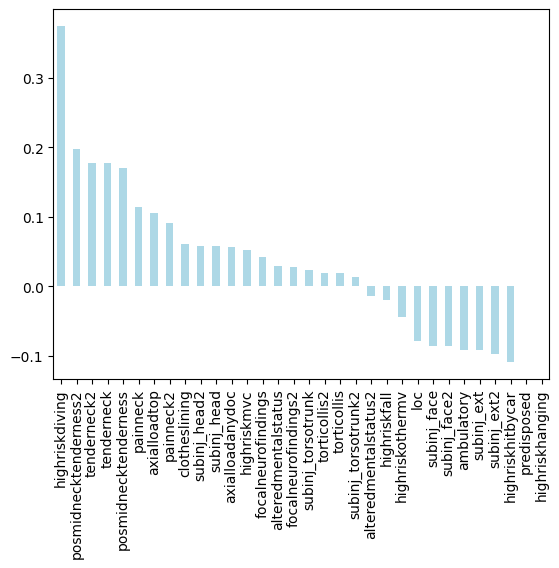